### Veri Görselleştirme Çalışması 2 (devam)

In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 3073-49B7

 Directory of C:\Users\murat\Documents\EcodationBootcamp\day10

19.08.2024  21:53    <DIR>          .
19.08.2024  21:51    <DIR>          ..
19.08.2024  21:53    <DIR>          .ipynb_checkpoints
23.07.2024  12:32           131.528 supermarket.csv
19.08.2024  21:52                72 Veri G”rselleŸtirme2.ipynb
               2 File(s)        131.600 bytes
               3 Dir(s)  88.426.483.712 bytes free


### Kütüphaneleri yükle/içe aktar

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Veriyi Yükle

In [20]:
df=pd.read_csv('supermarket.csv')

### Veri Ön İşleme

### Keşifsel Veri Analizi

In [21]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [22]:
df['Date']=pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [23]:
df['Date']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [24]:
df['Month']=df['Date'].dt.month_name()
df['Month']

0       January
1         March
2         March
3       January
4      February
         ...   
995     January
996       March
997    February
998    February
999    February
Name: Month, Length: 1000, dtype: object

In [25]:
df['Day_name']=df['Date'].dt.day_name()
df['Day_name']

0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: Day_name, Length: 1000, dtype: object

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
df['Time']=pd.to_datetime(df['Time'])
df['Hour']=df['Time'].dt.hour
df['Hour']

0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: Hour, Length: 1000, dtype: int32

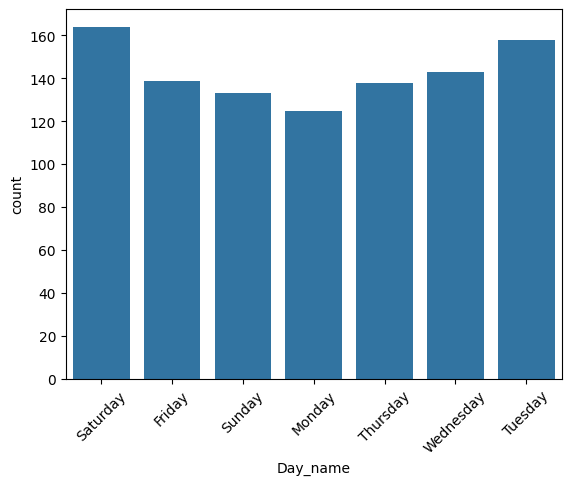

In [31]:
# Günlere göre alış veirş sayısı
sns.countplot(x=df['Day_name'])
plt.xticks(rotation=45);

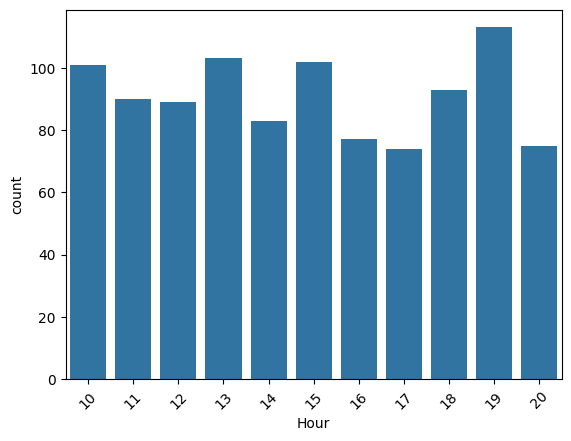

In [32]:
# Saatlere göre 
sns.countplot(x=df['Hour'])
plt.xticks(rotation=45);

<Axes: xlabel='Hour'>

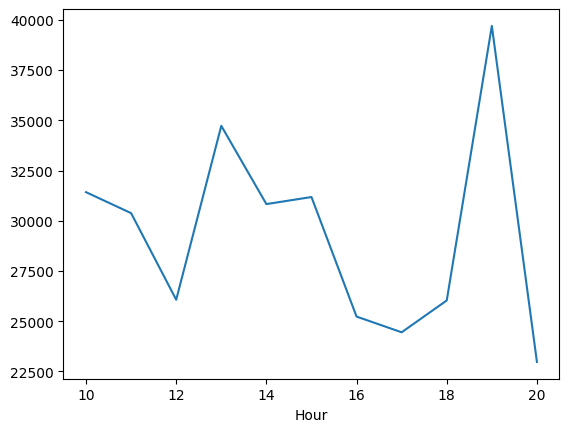

In [34]:
df.groupby('Hour')['Total'].sum().plot(kind='line')

<Axes: xlabel='Hour'>

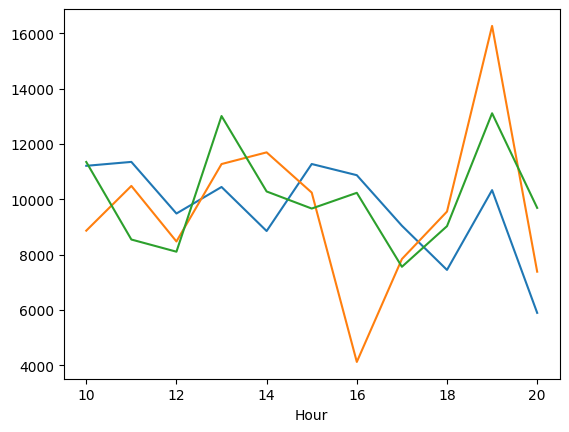

In [38]:
df[df['Branch']=='A'].groupby('Hour')['Total'].sum().plot(kind='line')
df[df['Branch']=='B'].groupby('Hour')['Total'].sum().plot(kind='line')
df[df['Branch']=='C'].groupby('Hour')['Total'].sum().plot(kind='line')

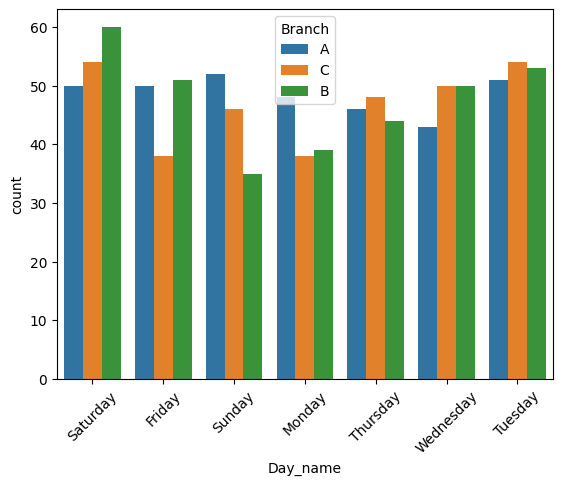

In [43]:
sns.countplot(x='Day_name', hue='Branch',data=df)
#sns.countplot(x=df['Day_name'], hue=df['Branch'])
plt.xticks(rotation=45);

<Axes: xlabel='Hour', ylabel='Total'>

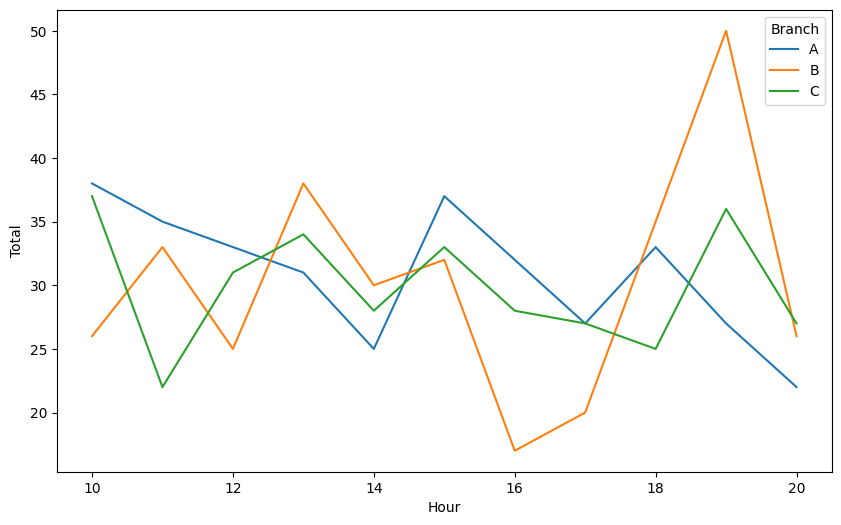

In [63]:
# Kayıt sayısını grupla
df_grouped = df.groupby(['Hour', 'Branch'], as_index=False)['Total'].count()

# Çizgi grafiği oluşturma
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='Total', hue='Branch', data=df_grouped)

<Axes: xlabel='Hour'>

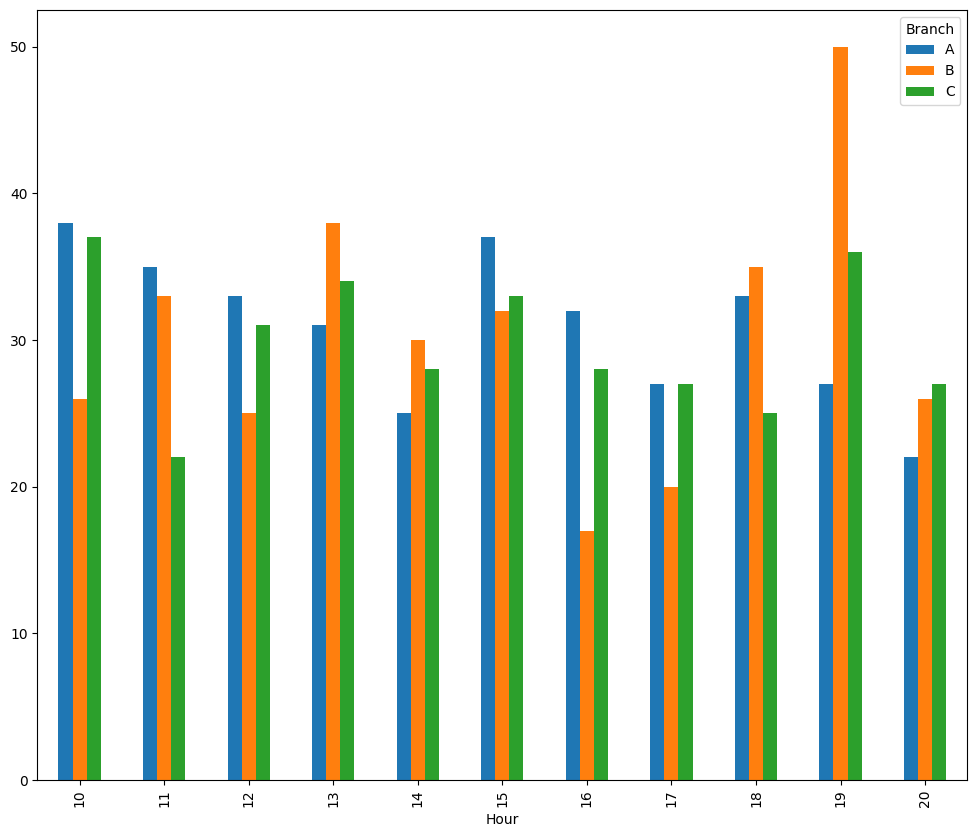

In [66]:
df.groupby(['Branch','Hour'])['Total'].count().unstack(level='Branch').plot(kind='bar', figsize=(12,10))
#Çok kullanışlı değil

<Axes: xlabel='Branch'>

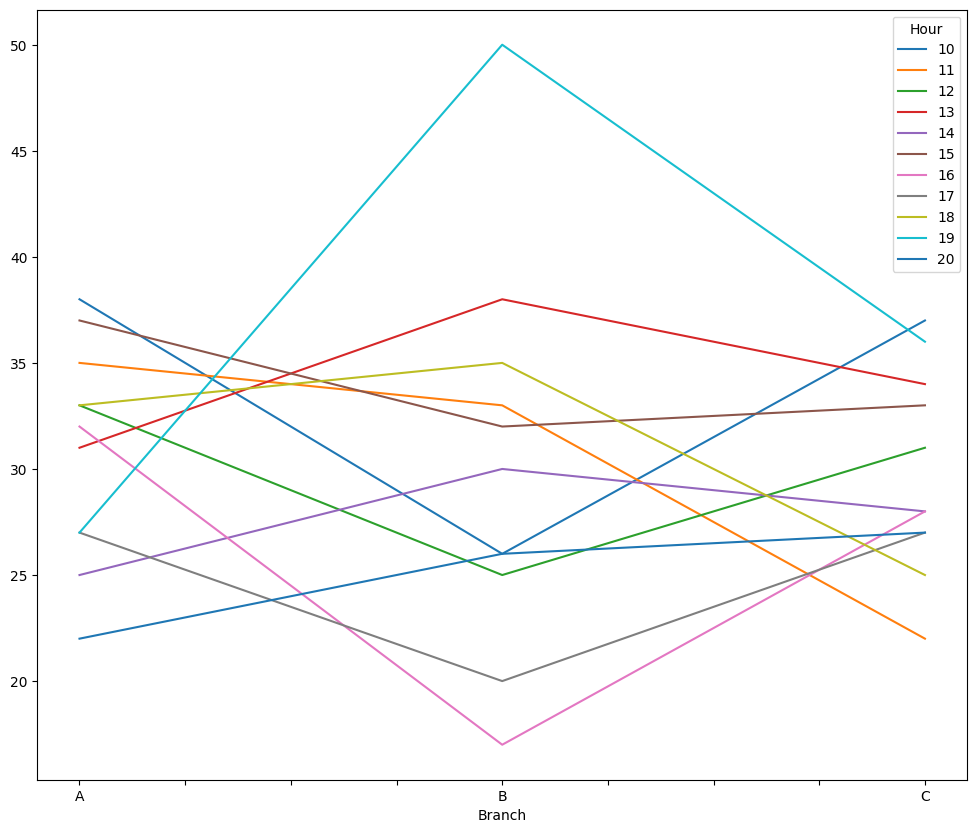

In [64]:
df.groupby(['Branch','Hour'])['Total'].count().unstack(level='Hour').plot(kind='line', figsize=(12,10))
#Hiç kullanışlı bir grafik değil

In [52]:
df.groupby('City')['Rating'].mean()

City
Mandalay     6.818072
Naypyitaw    7.072866
Yangon       7.027059
Name: Rating, dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'Mandalay'), Text(1, 0, 'Naypyitaw'), Text(2, 0, 'Yangon')])

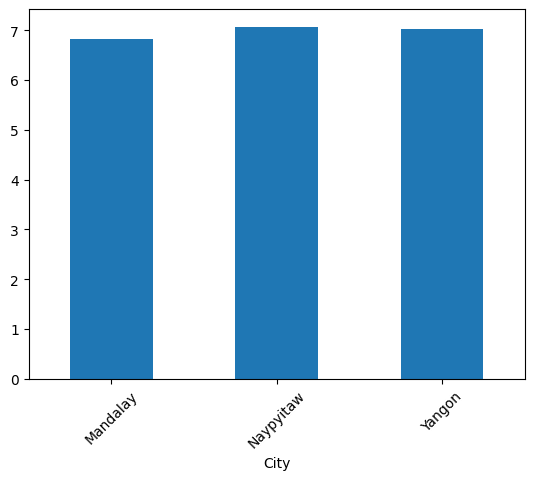

In [55]:
df.groupby('City')['Rating'].mean().plot(kind='bar')
plt.xticks(rotation=45)

<Axes: xlabel='Hour'>

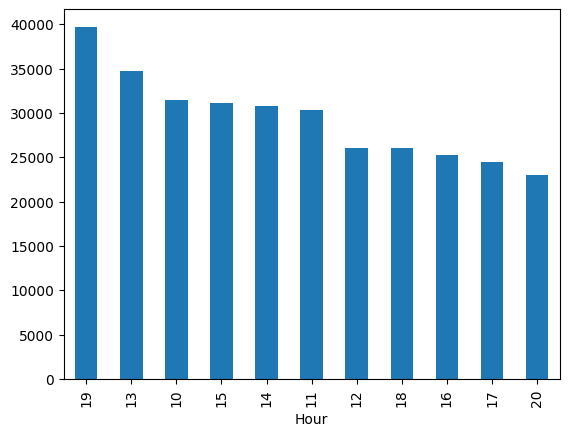

In [58]:
df.groupby('Hour')['Total'].sum().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Hour'>

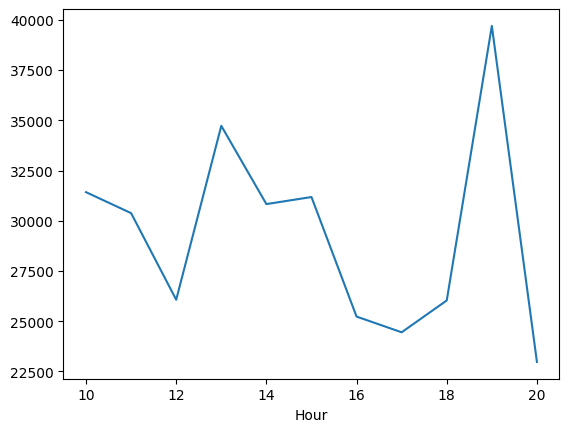

In [59]:
df.groupby('Hour')['Total'].sum().plot(kind='line')

In [67]:
## Korelasyon
df.select_dtypes(include='number').corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Hour
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,0.008242
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,-0.007317
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002770
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002770
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002770
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002770
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.030588
Hour,0.008242,-0.007317,-0.002770,-0.002770,-0.002770,NaN,-0.002770,-0.030588,1.000000


<Axes: >

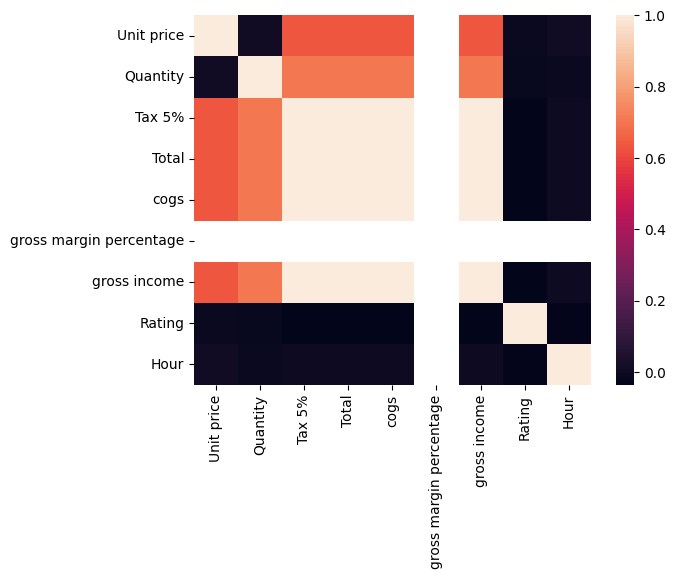

In [68]:
df_corr=df.select_dtypes(include='number').corr()
sns.heatmap(df_corr)

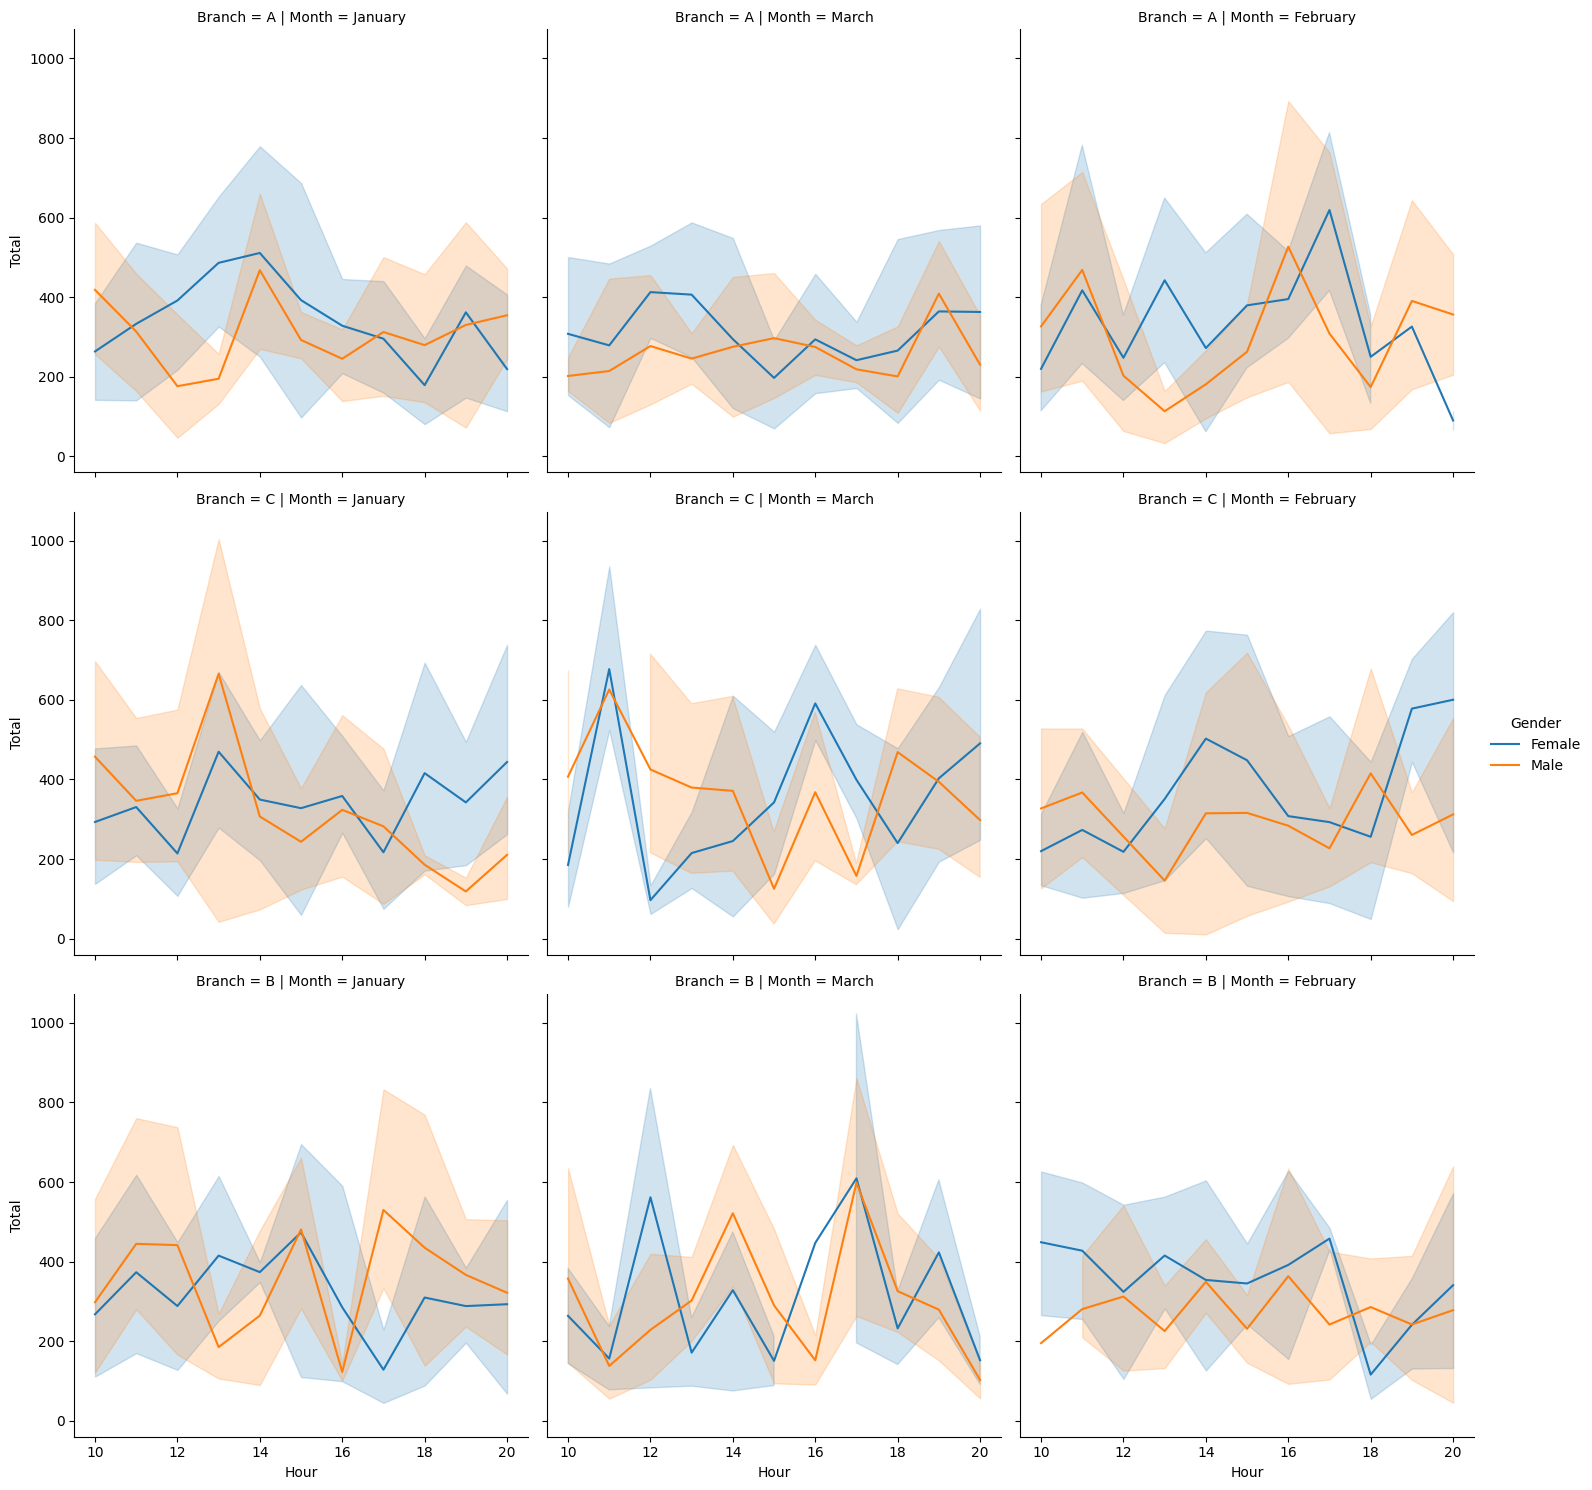

In [71]:
## Birden fazla kritere göre inceleme
sns.relplot(x='Hour', y='Total', 
          col='Month', row='Branch',
          kind='line', hue='Gender',
          data=df)